<a href="https://colab.research.google.com/github/lagonee23/game-analysis/blob/main/game_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🕹️ Data Description:

- Name : 게임 이름
- Platform : 게임 출시 플랫폼 (예: PC, PS4 등)
- Year : 게임이 출시된 연도
- Genre : 게임 장르
- Publisher : 게임 제작 회사
- NA_Sales : 북미 지역 매출(백만 단위)
- EU_Sales : 유럽 지역 매출(백만 단위)
- JP_Sales : 일본 내 매출(백만 단위)
- Other_Sales : 기타 지역의 매출(백만 단위)

# 데이터 및 라이브러리 불러오기

> URL을 사용하여 GitHub의 CSV 파일을 불러오고, `info()`와 `describe()` 메서드를 통해 종합적으로 정보를 확인합니다.

In [48]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rc('font', family='NanumBarunGothic')

In [50]:
url = 'https://raw.githubusercontent.com/lagonee23/game-analysis/main/data/vgsales.csv'

df_origin = pd.read_csv(url)
df_origin.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


In [51]:
# 원본 테이블 정보
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16598 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [52]:
# 원본 테이블 통계 정보
df_origin.describe()

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000


### ☝ `info()` 메서드를 통해 알아낸 점
- `Year`, `Publisher` 열에서 결측치가 존재함
- `Year`의 자료형이 정수형이 아님

# Data Wrangling

> Data Wrangling 과정을 통해 데이터를 분석하기 용이한 형태로 정제합니다.

1. 필요 없는 열 제거
2. 결측치 제거
3. `Year`의 자료형을 정수형으로 변환
4. `Total` 컬럼을 추가
5. 데이터의 final version을 저장

### 1. 필요 없는 열 제거

In [53]:
df = df_origin.copy()  # 원본 복사

df.drop('Unnamed: 0', axis=1, inplace=True)  # 컬럼 제거

# 컬럼 순서 변경
df = df[['Year', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df.columns

Index(['Year', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

### 2. 결측치 제거


In [54]:
df.dropna(inplace=True)

# 결측치 확인
df.isnull().sum()

Year           0
Name           0
Platform       0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

### 3. `Year`의 자료형을 정수형으로 변환

In [55]:
df['Year'] = df['Year'].astype(int)
df['Year'].dtype

dtype('int64')

In [56]:
# 연도순으로 정렬
df.sort_values('Year', inplace=True)
df['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

### 4. `Total` 컬럼을 추가

In [57]:
df['Total'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
df.reset_index(inplace=True, drop=True)  # 인덱스 초기화
df.head()

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,1980,Asteroids,2600,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,1980,Bridge,2600,Misc,Activision,0.25,0.02,0.0,0.00,0.27
2,1980,Defender,2600,Misc,Atari,0.99,0.05,0.0,0.01,1.05
3,1980,Freeway,2600,Action,Activision,0.32,0.02,0.0,0.00,0.34
4,1980,Kaboom!,2600,Misc,Activision,1.07,0.07,0.0,0.01,1.15


### 5. 데이터의 final version을 저장

In [58]:
df.to_csv('vgsales_edited.csv', index=False)

# EDA(exploratory data analysis, 탐색적 데이터 분석)

> 우선 종합적으로 어떤 장르의 게임이 가장 많이 출고가 되었는지 막대그래프를 통해 알아보겠습니다.


## 지역에 따른 게임 트렌드
1. 장르에 따른 통합 출구량 확인
2. 수평 막대 그래프로 시각화
3. `Genre`별로 그룹화 하여 지역별 총 출구량을 확인
4. 수직 막대 그래프 시각화
5. 분석 내용

### 장르에 따른 통합 판매량 확인

In [59]:
genre_global = df.groupby('Genre')['Total'].sum()

# 순서정렬
genre_global = genre_global.sort_values(ascending=False)
genre_global

Genre
Action          1721.82
Sports          1308.84
Shooter         1025.69
Role-Playing     923.74
Platform         828.80
Misc             789.28
Racing           726.53
Fighting         444.08
Simulation       389.70
Puzzle           241.68
Adventure        234.36
Strategy         173.00
Name: Total, dtype: float64

### 수평 막대 그래프로 시각화

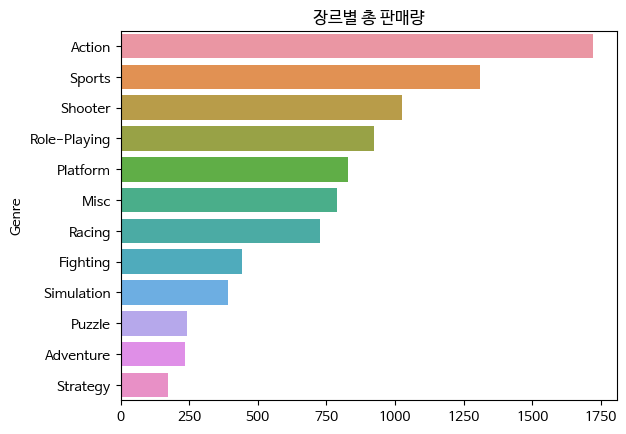

In [60]:
# 수평 막대 그래프 생성
sns.barplot(x=genre_global.values, y=genre_global.index)
plt.title("장르별 총 판매량");

### `Genre`별로 그룹화 하여 지역별 판매량을 확인

In [61]:
genre_local = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
genre_local

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,861.77,516.48,158.65,184.92
1,Adventure,101.93,63.74,51.99,16.70
2,Fighting,220.74,100.00,87.15,36.19
3,Misc,396.92,211.77,106.67,73.92
4,Platform,445.99,200.65,130.65,51.51
5,Puzzle,122.01,50.52,56.68,12.47
6,Racing,356.93,236.31,56.61,76.68
7,Role-Playing,326.50,187.57,350.29,59.38
8,Shooter,575.16,310.45,38.18,101.90
9,Simulation,181.78,113.02,63.54,31.36


### 수직 막대 그래프 시각화

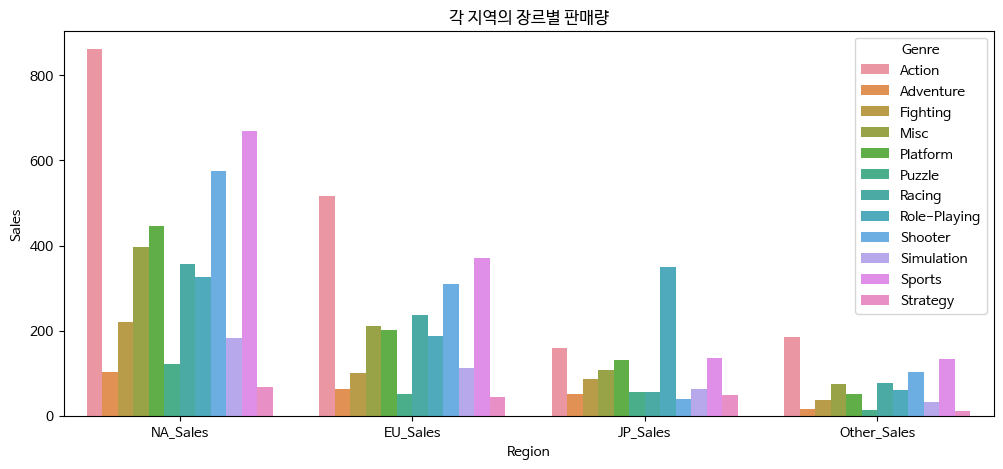

In [62]:
# genre_local 테이블을 길게 변환하여 각 지역에 대한 판매량이 개별 행으로 표시되도록 함.
genre_local_melted = genre_local.melt(id_vars='Genre', var_name='Region', value_name='Sales')

# 막대 그래프 생성
plt.figure(figsize=(12,5))
sns.barplot(data=genre_local_melted, x='Region', y='Sales', hue='Genre')
plt.title('각 지역의 장르별 판매량');

### 🔍 분석 내용(1)
- 전 세계적으로 가장 있기있는 게임 장르는 `Action`이라 할 수 있다.
- 하지만 일본에서만큼은 약세를 보이며, 일본 한정 `Role-Playing` 장르가 강세이다.
- 일본 외 다른 지역은 비슷한 게임 선호도 분포를 가진다. 유독 일본은 좀 다르다.
- 따라서 일본 시장을 고려할 경우, 타 지역과는 다른 접근법이 필요함을 알 수 있다.

### 연도 포함 세분화 과정
1. Line 차트로 시각화
2. 분석 내용

In [73]:
# 연도별, 장르별로 그룹화
genre_year = df.groupby(['Year', 'Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total'].sum().reset_index()

genre_year.head()

<ipython-input-73-34047d19cfcc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_year = df.groupby(['Year', 'Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total'].sum().reset_index()


,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,1980,Action,0.32,0.02,0.0,0.00,0.34
1,1980,Fighting,0.72,0.04,0.0,0.01,0.77
2,1980,Misc,2.53,0.15,0.0,0.02,2.70
3,1980,Shooter,6.56,0.43,0.0,0.08,7.07
4,1980,Sports,0.46,0.03,0.0,0.01,0.50


### Line 차트로 시각화

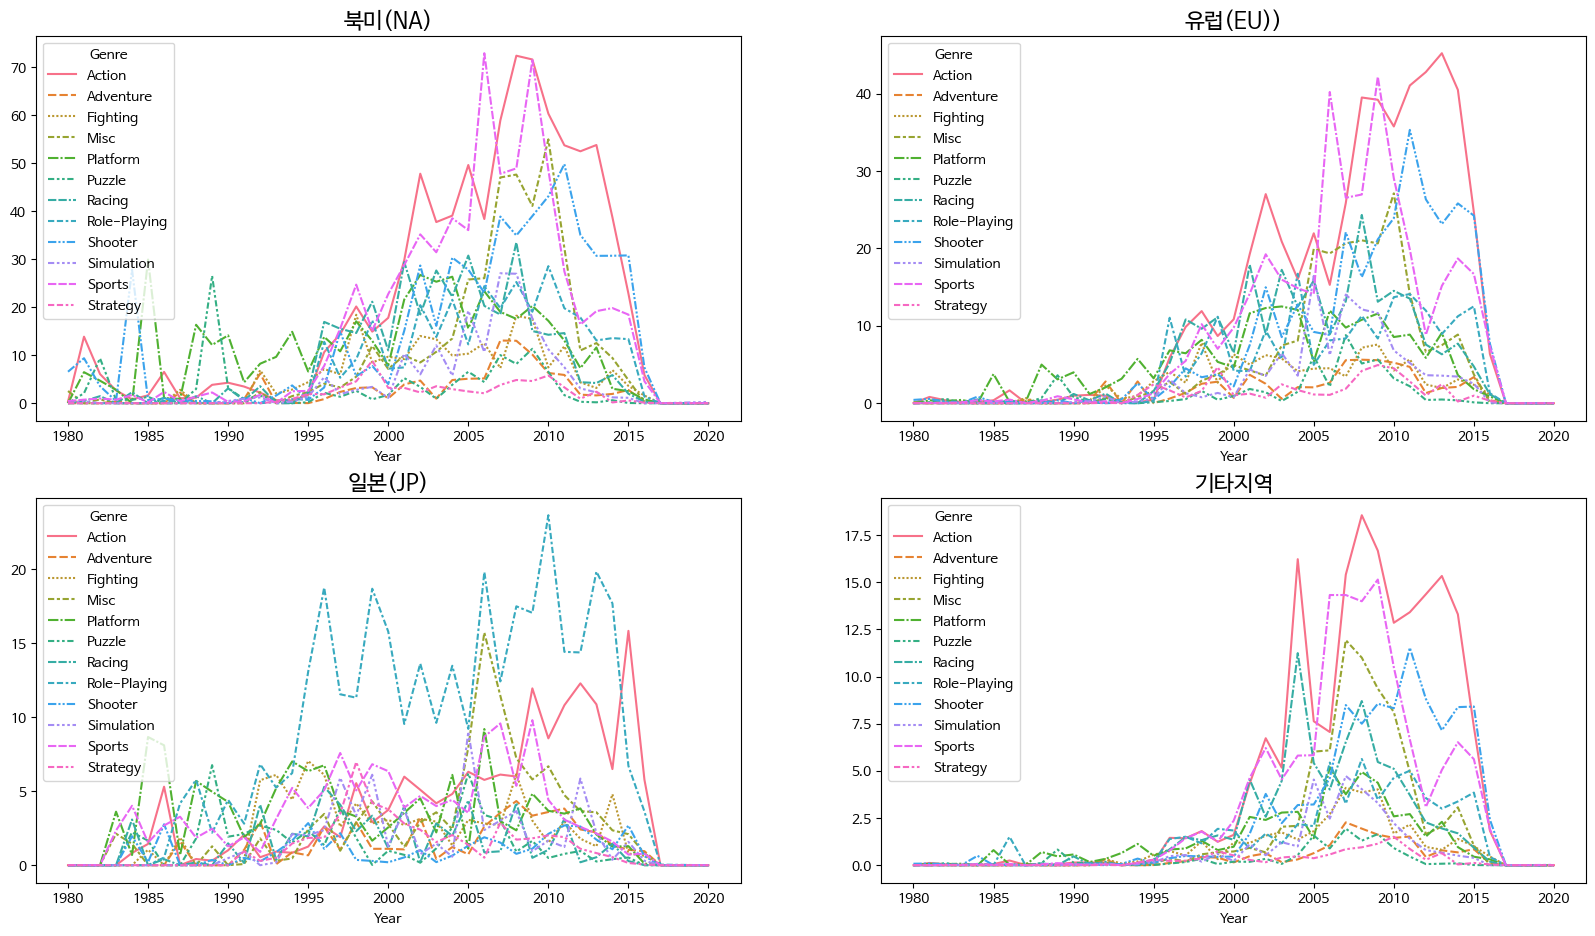

In [64]:
# pivot table로 변경
genre_NA = genre_year.pivot(index='Year', columns='Genre', values='NA_Sales').fillna(0)
genre_EU = genre_year.pivot(index='Year', columns='Genre', values='EU_Sales').fillna(0)
genre_JP = genre_year.pivot(index='Year', columns='Genre', values='JP_Sales').fillna(0)
genre_OTH = genre_year.pivot(index='Year', columns='Genre', values='Other_Sales').fillna(0)

plt.figure(figsize=(20, 11))

plt.subplot(2, 2, 1)
sns.lineplot(data=genre_NA)
plt.title('북미(NA)', fontsize=16)

plt.subplot(2, 2, 2)
sns.lineplot(data=genre_EU)
plt.title('유럽(EU))', fontsize=16)

plt.subplot(2, 2, 3)
sns.lineplot(data=genre_JP)
plt.title('일본(JP)', fontsize=16)

plt.subplot(2, 2, 4)
sns.lineplot(data=genre_OTH)
plt.title('기타지역', fontsize=16);

### 🔍 분석 내용(2)
- 북미(NA)의 게임 장르는 `Action`이 가장 우세해 보였지만 연도별 차트를 봤을 때, `Shooter`가 최근 트렌드에 더 적합한 것으로 보인다.
- 유럽(EU) 또한`Action`과 `Shooter` 장르가 강세이다.
- 일본은 `Role_Playing` 게임이 가장 인기가 많았지만 예전만하지 못하고, 글로벌 흐름에 따라 `Action` 게임의 매출이 증가하고 있다.
- 그 외 기타지역에서는 `Action`, `Shooter`, `Sports` 순으로 대세 게임 장르라 볼 수 있다.

## 연도별 게임 트렌드
1. `genre_year`을 10년 단위로 나누기
2. 차트의 매개변수에 놓일 함수 만들기
3. Pie 차트로 트렌드 분석(10년 주기)
4. 분석 내용

### `genre_year`을 10년 단위로 나누기
- 2020년도 데이터는 2010년대로 포함

In [74]:
genre_year_ten = genre_year.copy()  # gere_year 복사

for i in range(10):
  genre_year_ten['Year'].replace(1980+i, '80', inplace=True)  # 1980 ~ 1989의 Year 값을 80으로 대체
  genre_year_ten['Year'].replace(1990+i, '90', inplace=True)  # 1990 ~ 1999의 Year 값을 90으로 대체
  genre_year_ten['Year'].replace(2000+i, '00', inplace=True)  # 2000 ~ 2009의 Year 값을 00으로 대체
  genre_year_ten['Year'].replace(2010+i, '10', inplace=True)  # 2010 ~ 2019의 Year 값을 10으로 대체

genre_year_ten['Year'].replace(2020, '10', inplace=True)  # 2020년도 또한 2010년대로 간주

genre_year_sum = genre_year_ten.groupby(['Year', 'Genre'])['Total'].sum().reset_index()
gys_pivot = genre_year_sum.pivot(index='Year', columns='Genre', values='Total').fillna(0)

# 인덱스 재배열
gys_pivot = gys_pivot.reindex(['80', '90', '00', '10'])
gys_pivot

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
80,51.10,4.78,7.24,8.44,122.26,62.75,12.10,15.25,59.77,0.51,32.28,0.00
90,139.26,44.80,123.51,63.49,208.87,38.94,150.33,184.62,68.89,52.04,146.47,57.51
00,858.31,123.79,231.26,479.26,376.94,118.81,440.46,418.23,434.39,266.02,805.31,79.84
10,673.15,60.99,82.07,238.09,120.73,21.18,123.64,305.64,462.64,71.13,324.78,35.65


### 차트의 매개변수에 놓일 함수 만들기
- 함수의 매개변수 `data`는 `gys_pivot` 테이블의 행 한줄을 의미함
- 데이터셋에서 차지하는 비중이 5% 미만이면 기타항목 `ETC`로 분류한다.
- 비중이 5% 이상인 항목들만 구성하여 최종적으로 `Series` 자료형로 반환한다.

In [66]:
def ratio_table(data):
  etc = 0
  new_dict = dict()
  for (i, e) in enumerate(data):
    ratio = e / data.sum()
    if ratio < 0.05:
      etc += e
    else:
      # 비중이 5%가 넘는 항목들만 포함
      new_dict[data.index[i]] = e
  # 5% 미만인 것들을 합쳐서 기타항목으로 구성
  new_dict['ETC'] = etc
  return pd.Series(new_dict)

### Pie 차트로 트렌드 분석(10년 주기)




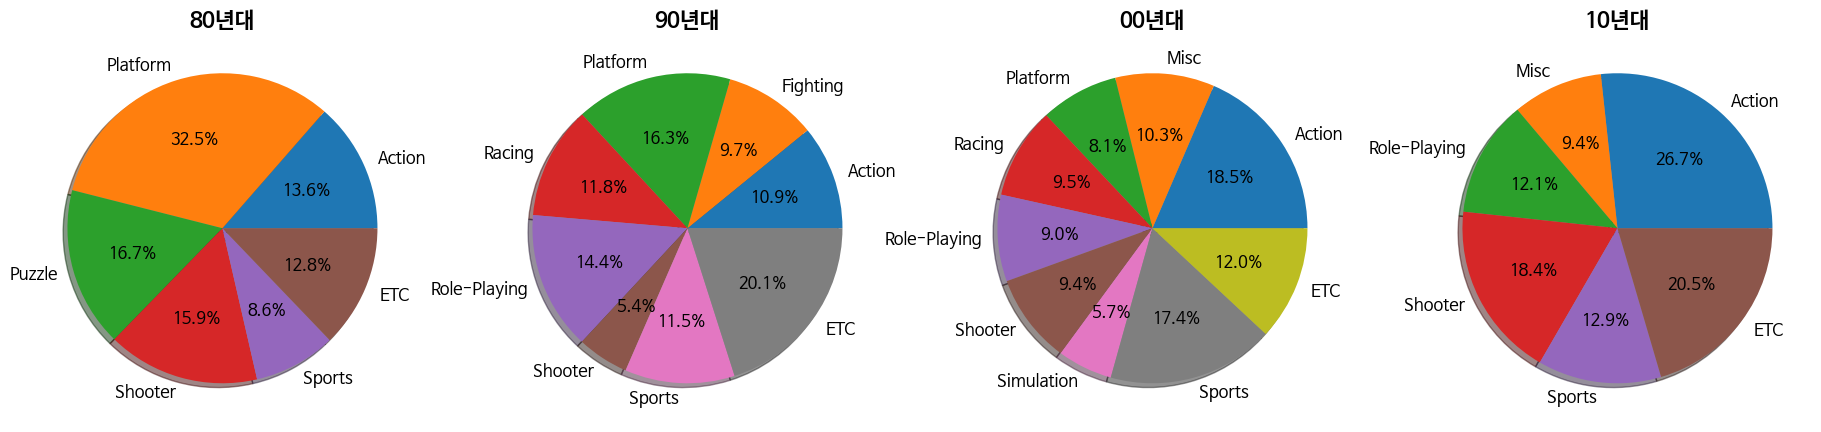

In [77]:
plt.figure(figsize=(23, 14))

for i in range(4):
  plt.subplot(1, 4, i+1)
  ratio = ratio_table(gys_pivot.iloc[i])
  textprops = dict(size=12, weight=3)
  # 파이차트로 출력
  plt.pie(x=ratio, labels=ratio.index, autopct='%.1f%%', shadow=True, textprops=textprops);
  plt.title(f'{gys_pivot.index[i]}년대', fontsize=16, fontweight='bold')

### 분석 내용
- `Action` 장르의 게임은 총 판매량의 경우에도 그렇고, 최신 트렌드의 경우에도 그렇고 항상 인기 게임의 위상에서 벗어나지 않고 있음을 알 수 있다. 오히려 시간이 가면 갈수록 더 많은 판매량을 기록하는 걸로 보아서 해당 장르의 게임은 항상 수요가 많다는 것을 알 수 있다.
- `Shooter`도 항상 2순위지만 만만치 않게 수요가 높다.
- 게임 산업이 발전함에 따라 다양한 장르의 게임을 즐기는 이용자들이 많아지는 추세이다.

# 평균으로 다시 분석해보자

In [68]:
# 평균으로 그룹화
genre_year_mean = genre_year_ten.groupby(['Year', 'Genre'])['Total'].mean().reset_index()
gym_pivot = genre_year_mean.pivot(index='Year', columns='Genre', values='Total').fillna(0)
gym_pivot = gym_pivot.reindex(['80', '90', '00', '10'])
gym_pivot

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
80,5.11000,2.390000,2.413333,1.688000,13.584444,8.964286,2.420000,3.8125,5.977000,0.17000,3.228000,0.000000
90,13.92600,4.977778,13.723333,7.054444,20.887000,3.894000,15.033000,18.4620,7.654444,5.20400,14.647000,6.390000
00,85.83100,12.379000,23.126000,47.926000,37.694000,11.881000,44.046000,41.8230,43.439000,26.60200,80.531000,7.984000
10,84.14375,8.712857,11.724286,34.012857,17.247143,3.530000,17.662857,38.2050,66.091429,8.89125,46.397143,5.092857


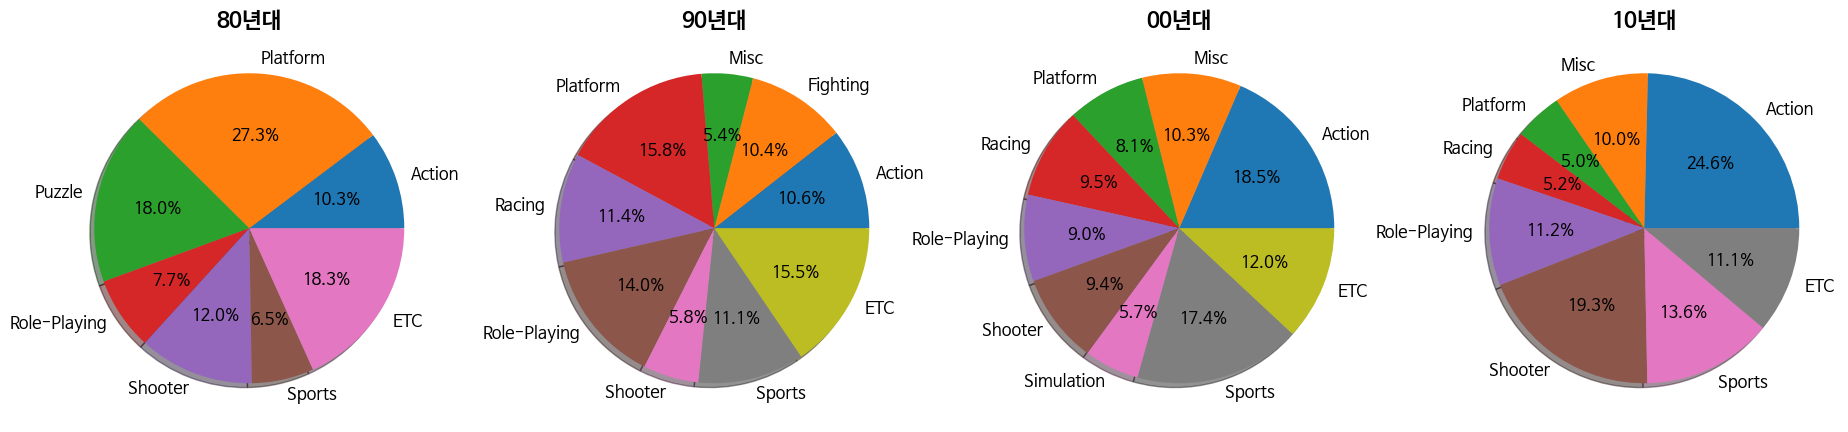

In [69]:
plt.figure(figsize=(23, 14))

for e in range(4):
  plt.subplot(1, 4, e+1)
  ratio = ratio_table(gym_pivot.iloc[e])
  textprops = dict(size=12, weight=3)
  plt.pie(x=ratio, labels=ratio.index, autopct='%.1f%%', shadow=True, textprops=textprops);
  plt.title(f'{gym_pivot.index[e]}년대', fontsize=16, fontweight='bold')

### `Action`과 `Shooter`의 차이는 유의미한가?
- 귀무가설($H_0$): $ \mu_{shooter} \leq \mu_{action} $
- 대립가설($H_a$): $ \mu_{shooter} > \mu_{action} $

In [70]:
action = df.query('Year >= 2010')[df.Genre=='Action']['Total'].reset_index(drop=True)
shooter = df.query('Year >= 2010')[df.Genre=='Shooter']['Total'].reset_index(drop=True)

tt = stats.ttest_ind(a=shooter, b=action, alternative='greater')
print('P-value:', round(tt.pvalue, 3))

P-value: 0.0


<ipython-input-70-da97b270c86b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  action = df.query('Year >= 2010')[df.Genre=='Action']['Total'].reset_index(drop=True)
<ipython-input-70-da97b270c86b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shooter = df.query('Year >= 2010')[df.Genre=='Shooter']['Total'].reset_index(drop=True)


### 분석 내용
- 10년대 파이 차트를 주목해보면 출구량의 합계일 경우의 차트와 비교했을 때, `Action`과 `Shooter`의 차이가 더 벌어졌음을 알 수 있다.
- p값이 0.05보다 작아 귀무가설을 기각하고 대립가설을 채택한다. 즉 `shooter`의 출고량 평균은 `action`의 출고량 평균보다 유의미하게 크다고 볼 수 있다.
- 이는 곧 `Action`장르의 공급량이 출고량에 비해 많다는 의미이며, 평균적으로 높은 출고량을 기록한 `Shooter`가 시장 진출에 더 유리할 것으로 보인다.